In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./Dataset/digit-recognizer/train.csv')


In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X,Y = data.drop('label',axis = 1),data['label']
X = X/255.0

In [5]:
X = np.array(X).reshape(X.shape[0],28,28)
Y = keras.utils.to_categorical(Y,num_classes = 10)

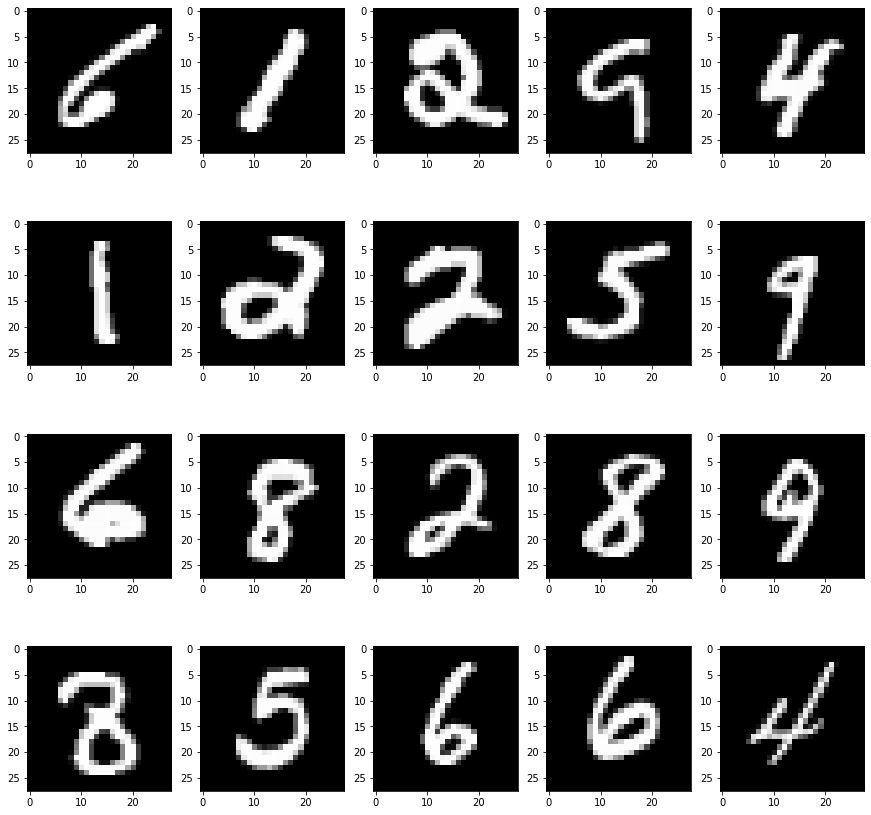

In [6]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    loc = random.randint(0,len(X)-1)
    plt.imshow(X[loc],cmap = 'gray')
plt.show()

In [7]:
X = X.reshape(-1,28,28,1)

In [8]:
Xtrain, xval, Ytrain, yval = train_test_split(X,Y,test_size = 0.22)

In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                              activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 64,kernel_size = (5,5),
                              activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),strides = (1,1),padding = 'same'))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu',padding = 'same'))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation = 'softmax'))

In [10]:
keras.utils.plot_model(model,to_file = 'model.png',show_shapes = True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [12]:
history = model.fit(Xtrain, Ytrain, epochs = 50, batch_size = 32, validation_data = (xval, yval))

Train on 32760 samples, validate on 9240 samples
Epoch 1/50
32760/32760 [==============================] - 308s 9ms/sample - loss: 0.1907 - accuracy: 0.9412 - val_loss: 0.0613 - val_accuracy: 0.9804
Epoch 2/50
32760/32760 [==============================] - 314s 10ms/sample - loss: 0.0700 - accuracy: 0.9794 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 3/50
32760/32760 [==============================] - 300s 9ms/sample - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0423 - val_accuracy: 0.9876
Epoch 4/50
32760/32760 [==============================] - 288s 9ms/sample - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 5/50
32760/32760 [==============================] - 297s 9ms/sample - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 6/50
32760/32760 [==============================] - 294s 9ms/sample - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 7/50
32760/32760 [==========================

In [13]:
score = model.evaluate(xval, yval, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05338214559798858
Test accuracy: 0.9916667


In [14]:
model.save('mnist_cnn.h5')

In [16]:
import pickle
test_dataset = pickle.load(open('./Dataset/testData','rb'))